## FIT5145: Foundations of Data Science Assignments 3: Business and Data Case Study

Student Name: Tan Fan Hwa

Student ID: 34648100

### 2.0 Load Library

In [21]:
# Read Excel File
library(knitr)
library(tidyr)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(naniar)
library(reshape2)
library(caret)
library(readxl)

### 3.0 Reading the Data and Preprocessing

In [22]:
file_path = "Claims-statistical-report-calendar-year-2024-06.xlsx"

# List all sheets in the Excel file
sheet_names <- excel_sheets(file_path)
print(sheet_names)

 [1] "Contents"                      "Definitions"                  
 [3] "Injury year"                   "Age and gender"               
 [5] "Mechanism of injury"           "Nature of injury (affliction)"
 [7] "Bodily location"               "Agency of injury"             
 [9] "Occupation"                    "Industry division"            


#### 3.1 Industry Division Data

In [23]:
# Read Industry division sheet
industry_division_df <- read_excel(file_path, sheet = "Industry division", skip = 10)

industry_division_df <- industry_division_df[, 1:14]

# Rename columns to proper names (as shown in the screenshot)
colnames(industry_division_df) <- c("industry_division", "2011", "2012", "2013", 
                               "2014", "2015", "2016", "2017", "2018", "2019", 
                               "2020", "2021", "2022", "2023")

# Convert column 2 to 14 as numeric
industry_division_df[, 2:14] <- sapply(industry_division_df[, 2:14], as.numeric)

# Remove the first letter in the data in the industry_division column which serves as a tag
industry_division_df$industry_division <- sub("^\\w\\s+", "", industry_division_df$industry_division)

# Drop any rows with all NA values
industry_division_df <- industry_division_df[complete.cases(industry_division_df), ]

industry_division_df

New names:
• `` -> `...1`


industry_division,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Agriculture, Forestry and Fishing",556,583,530,569,590,595,599,650,603,644,709,704,686
Mining,159,155,153,127,132,124,130,104,119,116,134,123,127
Manufacturing,5832,5419,4919,4551,4440,4333,4022,4217,4443,4218,4575,4427,4885
"Electricity, Gas, Water and Waste Services",324,323,311,304,368,366,353,391,363,335,419,386,472
Construction,3664,3562,3374,3204,3167,3325,3514,3926,4022,3933,4180,4199,4957
Wholesale Trade,1984,1945,1883,1792,1799,1683,1607,1677,1699,1583,1698,1702,1885
Retail Trade,1591,1582,1573,1504,1561,1560,1347,1469,1553,1361,1499,1558,1836
Accommodation and Food Services,846,953,904,948,895,943,916,974,1063,739,936,1055,1179
"Transport, Postal and Warehousing",2214,2319,2227,2027,2159,2055,2022,2136,2207,2053,2317,2330,2605


The `total` row will be removed from the data as it don't represent individual observations or unique categories. Including them in analysis (especially visualizations or correlations) can lead to misleading insights.

In [24]:
# remove `total` row
industry_division_df <- industry_division_df[-nrow(industry_division_df), ]

industry_division_df

industry_division,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Agriculture, Forestry and Fishing",556,583,530,569,590,595,599,650,603,644,709,704,686
Mining,159,155,153,127,132,124,130,104,119,116,134,123,127
Manufacturing,5832,5419,4919,4551,4440,4333,4022,4217,4443,4218,4575,4427,4885
"Electricity, Gas, Water and Waste Services",324,323,311,304,368,366,353,391,363,335,419,386,472
Construction,3664,3562,3374,3204,3167,3325,3514,3926,4022,3933,4180,4199,4957
Wholesale Trade,1984,1945,1883,1792,1799,1683,1607,1677,1699,1583,1698,1702,1885
Retail Trade,1591,1582,1573,1504,1561,1560,1347,1469,1553,1361,1499,1558,1836
Accommodation and Food Services,846,953,904,948,895,943,916,974,1063,739,936,1055,1179
"Transport, Postal and Warehousing",2214,2319,2227,2027,2159,2055,2022,2136,2207,2053,2317,2330,2605


We will drop out the `Other Services` row as it is not representing any individual industry and cannot contribute to the analysis.

In [25]:
# Drop Other Services row
industry_division_df <- industry_division_df[-which(industry_division_df$industry_division == "Other Services"), ]

industry_division_df

industry_division,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Agriculture, Forestry and Fishing",556,583,530,569,590,595,599,650,603,644,709,704,686
Mining,159,155,153,127,132,124,130,104,119,116,134,123,127
Manufacturing,5832,5419,4919,4551,4440,4333,4022,4217,4443,4218,4575,4427,4885
"Electricity, Gas, Water and Waste Services",324,323,311,304,368,366,353,391,363,335,419,386,472
Construction,3664,3562,3374,3204,3167,3325,3514,3926,4022,3933,4180,4199,4957
Wholesale Trade,1984,1945,1883,1792,1799,1683,1607,1677,1699,1583,1698,1702,1885
Retail Trade,1591,1582,1573,1504,1561,1560,1347,1469,1553,1361,1499,1558,1836
Accommodation and Food Services,846,953,904,948,895,943,916,974,1063,739,936,1055,1179
"Transport, Postal and Warehousing",2214,2319,2227,2027,2159,2055,2022,2136,2207,2053,2317,2330,2605


#### 3.2 Bodily Location Data

In [26]:
# Read Bodily location sheet
bodily_location_df <- read_excel(file_path, sheet = "Bodily location", skip = 3)

bodily_location_df <- bodily_location_df[, 1:14]

# Rename columns to proper names (as shown in the screenshot)
colnames(bodily_location_df) <- c("bodily_location", "2011", "2012", "2013", 
                               "2014", "2015", "2016", "2017", "2018", "2019", 
                               "2020", "2021", "2022", "2023")

# Convert column 2 to 14 as numeric
bodily_location_df[, 2:14] <- sapply(bodily_location_df[, 2:14], as.numeric)

# Drop any rows with all NA values
bodily_location_df <- bodily_location_df[complete.cases(bodily_location_df), ]

# Remove leading numbers from the bodily_location column
bodily_location_df$bodily_location <- sub("^\\d+\\s+", "", bodily_location_df$bodily_location)

# Drop rows with `total` in the bodily_location column
bodily_location_df <- bodily_location_df[!grepl("Total", bodily_location_df$bodily_location, ignore.case = TRUE), ]

bodily_location_df

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
Warning message in lapply(X = X, FUN = FUN, ...):
"NAs introduced by coercion"


bodily_location,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cranium,305,270,279,290,425,364,415,456,453,451,421,478,568
Eye,172,159,134,131,117,135,131,120,148,108,116,132,149
Ear,1700,1590,1422,1188,1121,1213,1039,1054,1191,1388,2024,2372,3291
Mouth,161,165,159,165,159,139,131,156,140,131,105,125,115
Nose,55,73,56,54,60,75,68,65,64,65,80,56,75
"Face, Not Elsewhere Classified",176,182,162,165,156,152,175,167,197,153,156,193,203
Head - Multiple Locations,29,26,27,20,17,12,12,5,3,10,10,10,27
Head - Unspecified Locations,98,79,65,76,87,99,74,59,64,62,74,78,81
Neck,964,910,826,771,843,816,855,824,870,705,775,806,822


We will drop out the `Unspecified Location` row as it is not representing any individual location and cannot contribute to the analysis.

In [27]:
# Drop rows with `Unspecified Location` in the bodily_location column
bodily_location_df <- bodily_location_df[!grepl("Unspecified Location", bodily_location_df$bodily_location, ignore.case = TRUE), ]

bodily_location_df

bodily_location,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cranium,305,270,279,290,425,364,415,456,453,451,421,478,568
Eye,172,159,134,131,117,135,131,120,148,108,116,132,149
Ear,1700,1590,1422,1188,1121,1213,1039,1054,1191,1388,2024,2372,3291
Mouth,161,165,159,165,159,139,131,156,140,131,105,125,115
Nose,55,73,56,54,60,75,68,65,64,65,80,56,75
"Face, Not Elsewhere Classified",176,182,162,165,156,152,175,167,197,153,156,193,203
Head - Multiple Locations,29,26,27,20,17,12,12,5,3,10,10,10,27
Neck,964,910,826,771,843,816,855,824,870,705,775,806,822
Back - Upper Or Lower,5609,5469,5221,4894,4929,4528,4253,4501,4475,4231,4587,4490,5016


#### 3.3 Agency of Injury

In [28]:
# Read Agency of injury data
agency_of_injury_df <- read_excel(file_path, sheet = "Agency of injury", skip = 10)

agency_of_injury_df <- agency_of_injury_df[, 1:15]

# Rename columns to proper names
colnames(agency_of_injury_df) <- c("agency_of_injury_type","agency_of_injury", "2011", "2012", "2013", 
                               "2014", "2015", "2016", "2017", "2018", "2019", 
                               "2020", "2021", "2022", "2023")

agency_of_injury_df <- agency_of_injury_df %>% fill(agency_of_injury_type, .direction = "down")

# Remove the first digit and any following space in the 'agency_of_injury_type' column
agency_of_injury_df$agency_of_injury_type <- sub("^\\d+\\s+", "", agency_of_injury_df$agency_of_injury_type)

# Remove the first digit and any following space in the 'agency_of_injury' column
agency_of_injury_df$agency_of_injury <- sub("^\\d+\\s+", "", agency_of_injury_df$agency_of_injury)

# Reorder the columns to swap positions
agency_of_injury_df <- agency_of_injury_df %>%
  select(agency_of_injury, agency_of_injury_type, everything())

# Remove rows where 'agency_of_injury' is "Agency group total"
agency_of_injury_df <- agency_of_injury_df[agency_of_injury_df$agency_of_injury != "Agency group total", ]

# Drop any rows with all NA values
agency_of_injury_df <- agency_of_injury_df[complete.cases(agency_of_injury_df), ]

agency_of_injury_df

New names:
• `` -> `...1`
• `` -> `...2`


agency_of_injury,agency_of_injury_type,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cutting, Slicing, Sawing Machinery",Machinery And (Mainly) Fixed Plant,502,444,399,464,413,426,459,416,462,412,420,383,415
"Crushing, Pressing, Rolling Machinery",Machinery And (Mainly) Fixed Plant,368,373,426,355,372,384,302,332,159,85,83,105,126
"Heating, Cooking, Baking Equipment",Machinery And (Mainly) Fixed Plant,36,43,44,46,32,63,47,31,48,27,26,37,46
"Cooling, Refrigeration Plant And Equipment",Machinery And (Mainly) Fixed Plant,5,7,1,2,3,6,3,1,0,2,1,1,1
Conveyors And Lifting Plant,Machinery And (Mainly) Fixed Plant,380,379,308,284,291,321,288,301,351,273,276,276,336
Electrical Installation,Machinery And (Mainly) Fixed Plant,67,98,92,70,75,131,110,122,140,118,146,113,125
Radiation Based Equipment,Machinery And (Mainly) Fixed Plant,16,12,7,12,10,12,13,10,11,27,7,9,12
Filling And Bottling/Packaging Plant,Machinery And (Mainly) Fixed Plant,24,32,7,21,19,15,12,7,24,13,15,17,21
Other Plant And Equipment,Machinery And (Mainly) Fixed Plant,228,215,155,150,174,193,148,123,152,136,136,117,199


We will drop out the `agency_of_injury_type` with `Other And Unspecified Agencies` as it is not representing any individual agency and cannot contribute to the analysis.

In [29]:
# drop rows with `Other And Unspecified Agencies` in `agency_of_injury_type` column
agency_of_injury_df <- agency_of_injury_df[!grepl("Other And Unspecified Agencies", agency_of_injury_df$agency_of_injury_type, ignore.case = TRUE), ]

agency_of_injury_df

agency_of_injury,agency_of_injury_type,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cutting, Slicing, Sawing Machinery",Machinery And (Mainly) Fixed Plant,502,444,399,464,413,426,459,416,462,412,420,383,415
"Crushing, Pressing, Rolling Machinery",Machinery And (Mainly) Fixed Plant,368,373,426,355,372,384,302,332,159,85,83,105,126
"Heating, Cooking, Baking Equipment",Machinery And (Mainly) Fixed Plant,36,43,44,46,32,63,47,31,48,27,26,37,46
"Cooling, Refrigeration Plant And Equipment",Machinery And (Mainly) Fixed Plant,5,7,1,2,3,6,3,1,0,2,1,1,1
Conveyors And Lifting Plant,Machinery And (Mainly) Fixed Plant,380,379,308,284,291,321,288,301,351,273,276,276,336
Electrical Installation,Machinery And (Mainly) Fixed Plant,67,98,92,70,75,131,110,122,140,118,146,113,125
Radiation Based Equipment,Machinery And (Mainly) Fixed Plant,16,12,7,12,10,12,13,10,11,27,7,9,12
Filling And Bottling/Packaging Plant,Machinery And (Mainly) Fixed Plant,24,32,7,21,19,15,12,7,24,13,15,17,21
Other Plant And Equipment,Machinery And (Mainly) Fixed Plant,228,215,155,150,174,193,148,123,152,136,136,117,199


### Correlation Analysis between Industry Division and Agency of Injury

In [30]:
# Step 1: Create an empty dataframe to store the correlation results
industry_agency_correlation_df <- data.frame(agency_of_injury = agency_of_injury_df$agency_of_injury)

# Step 2: Loop through each industry division and calculate correlations
for (i in 1:nrow(industry_division_df)) {
  # Extract industry division name and data
  industry_division <- industry_division_df$industry_division[i]
  industry_data <- industry_division_df[i, -1]  # Skip the industry division name
  
  # Step 3: Get the year columns from both datasets
  colnames_industry <- colnames(industry_data)
  colnames_agency <- colnames(agency_of_injury_df[, -1])  # Skip the first column

  # Step 4: Align the columns by matching year ranges
  common_years <- intersect(colnames_industry, colnames_agency)
  
  # Subset both datasets to include only the common years
  industry_data_aligned <- industry_data[, common_years, drop = FALSE]
  agency_data_aligned <- agency_of_injury_df[, c("agency_of_injury", common_years), drop = FALSE]
  
  # Step 5: Transpose the industry data into a numeric vector
  industry_data_t <- as.numeric(unlist(industry_data_aligned))
  
  # Step 6: Calculate correlations for each agency_of_injury
  correlations <- apply(agency_data_aligned[, -1, drop = FALSE], 1, function(x) {
    cor(as.numeric(x), industry_data_t, use = "complete.obs")
  })
  
  # Step 7: Add the correlations to the dataframe, using the industry division name as the column name
  industry_agency_correlation_df[[industry_division]] <- correlations
}

# Step 8: View the final correlation dataframe
head(industry_agency_correlation_df)


,agency_of_injury,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Cutting, Slicing, Sawing Machinery",-0.5037289,0.34887597,0.43164383,-0.3982403,-0.26547961,0.30018584,-0.090370071,-0.1732805,-0.27751416,0.55905265,-0.09794956,0.2537279,-0.003321909,0.03145612,-0.40171246,-0.1413887,-0.4516652,0.12004142
2,"Crushing, Pressing, Rolling Machinery",-0.8385440,0.44554908,0.30047521,-0.5846712,-0.78899557,0.44891106,-0.005691200,-0.2606759,-0.39539722,0.43360234,-0.30488875,-0.1247318,-0.134466916,-0.47488655,-0.82373068,-0.3312261,-0.8732139,-0.02502980
3,"Heating, Cooking, Baking Equipment",-0.3976944,0.07457767,-0.01397141,-0.1122491,-0.22224112,0.09597456,0.281405948,0.3731950,-0.09775652,0.08695845,0.25513709,0.3951722,0.078261510,0.15450558,-0.19139463,0.1835568,-0.3283255,0.10178765
4,"Cooling, Refrigeration Plant And Equipment",-0.4348092,0.50822763,0.44920951,-0.3827637,-0.47778059,0.36471549,0.007657057,-0.3331152,-0.19395599,0.38497879,-0.17289962,-0.2419814,0.079542941,-0.26707635,-0.44566190,-0.2894742,-0.4868721,-0.28224697
5,Conveyors And Lifting Plant,-0.4102735,0.54224957,0.77309436,-0.1282427,0.04847611,0.70553542,0.508601796,0.2012405,0.33574116,0.75433729,0.14915258,0.3488595,0.563335602,0.25065938,-0.09709426,0.2529807,-0.2219022,0.33235587
6,Electrical Installation,0.6595459,-0.53435116,-0.46988747,0.6219228,0.59156084,-0.57449973,-0.029034177,0.3669296,0.23208027,-0.54999532,0.39547666,0.2714896,0.007533748,0.40408286,0.59323826,0.2001786,0.5139998,-0.03873931


As the dataset is large for the correlation analysis, we will select a subset of the data to perform the analysis. The subset will be selected based on the top 10 corelation values between the Industry Division and Agency of Injury.

In [31]:
# Filter out top 10 data with largest correlation score
top_10_correlation <- industry_agency_correlation_df %>%
  gather(key = "industry_division", value = "correlation", -agency_of_injury) %>%
  group_by(industry_division) %>%
  top_n(10, correlation) %>%
  arrange(desc(correlation))

head(top_10_correlation)

agency_of_injury,industry_division,correlation
<chr>,<chr>,<dbl>
Human Agencies,Public Administration and Safety,0.9724776
Human Agencies,Health Care and Social Assistance,0.9543658
Human Agencies,Construction,0.9486113
"Fastening, Packing And Packaging Equipment",Wholesale Trade,0.9372273
Indoor Environment,Education and Training,0.9107845
Indoor Environment,Public Administration and Safety,0.8852553


In [32]:
# Step 1: Initialize an empty list to store the plot data for each iteration
plot_data_list <- list()

# Step 2: Loop through top 5 correlations and collect data
for (i in 1:12) {
    industry_division <- top_10_correlation$industry_division[i]
    agency_of_injury <- top_10_correlation$agency_of_injury[i]
    correlation <- top_10_correlation$correlation[i]

    # Extract the industry data for the specific industry division
    industry_data <- industry_division_df[industry_division_df$industry_division == industry_division, -1]

    # Extract the agency data for the specific agency_of_injury, removing the first two columns
    agency_data <- agency_of_injury_df[agency_of_injury_df$agency_of_injury == agency_of_injury, -(1:2)]

    # Create a data frame for each combination
    years <- 2011:2023
    plot_data <- data.frame(
        Year = years,
        Industry_Claims = as.numeric(unlist(industry_data)),
        Agency_Claims = as.numeric(unlist(agency_data)),
        Industry_Division = industry_division,
        Agency_of_Injury = agency_of_injury
    )

    # Store the plot data for this iteration in the list
    plot_data_list[[i]] <- plot_data
}

# Step 3: Combine all the collected plot data into a single dataframe
final_plot_data <- do.call(rbind, plot_data_list)

print(final_plot_data)

    Year Industry_Claims Agency_Claims
1   2011            2020          4247
2   2012            2096          4011
3   2013            1879          3951
4   2014            1800          4023
5   2015            1939          4081
6   2016            1998          4132
7   2017            2112          4132
8   2018            2192          4823
9   2019            2373          5274
10  2020            2276          5426
11  2021            2745          6191
12  2022            2921          6314
13  2023            3208          7294
14  2011            4059          4247
15  2012            4215          4011
16  2013            4157          3951
17  2014            4157          4023
18  2015            4046          4081
19  2016            4008          4132
20  2017            3973          4132
21  2018            4224          4823
22  2019            4483          5274
23  2020            5212          5426
24  2021            5293          6191
25  2022            5135 

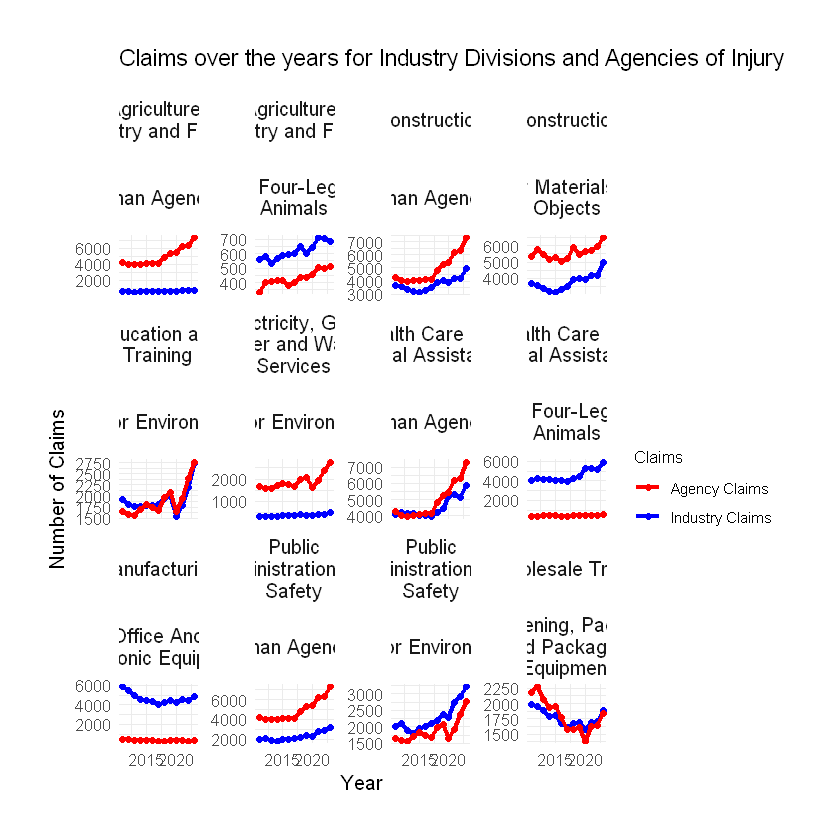

In [33]:
# {r, fig.width=12, fig.height=12}
custom_labeller <- labeller(
    Industry_Division = function(x) str_wrap(x, width = 20),  # Wrap industry names
    Agency_of_Injury = function(x) str_wrap(x, width = 20)    # Wrap agency names
)

# Create the ggplot with text wrapping in facet labels
ggplot(data = final_plot_data, aes(x = Year)) +
    geom_line(aes(y = Industry_Claims, color = "Industry Claims"), size = 1.2) +
    geom_point(aes(y = Industry_Claims, color = "Industry Claims")) +
    geom_line(aes(y = Agency_Claims, color = "Agency Claims"), size = 1.2) +
    geom_point(aes(y = Agency_Claims, color = "Agency Claims")) +
    facet_wrap(~ Industry_Division + Agency_of_Injury, scales = "free_y", labeller = custom_labeller) +  # Apply custom labeller
    labs(
        title = "Claims over the years for Industry Divisions and Agencies of Injury",
        x = "Year",
        y = "Number of Claims"
    ) +
    scale_color_manual(name = "Claims", values = c("Industry Claims" = "blue", "Agency Claims" = "red")) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 14),      # Increase title size
        axis.title = element_text(size = 12),      # Increase axis titles
        axis.text = element_text(size = 10),       # Increase axis text
        strip.text = element_text(size = 12),      # Increase facet label size
        legend.title = element_text(size = 10),    # Increase legend title size
        legend.text = element_text(size = 9)       # Increase legend text size
    ) +
    theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))  # Add margins around the plot for better spacing

From the plotting, we can observe some combinations of Industry Division and Agency of Injury that have a very similar plot pattern. We will select one of the combination to perform further analysis.

We will select the combination of `Public Admisnistration and Safety` and `Indoor Environment` for further analysis.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


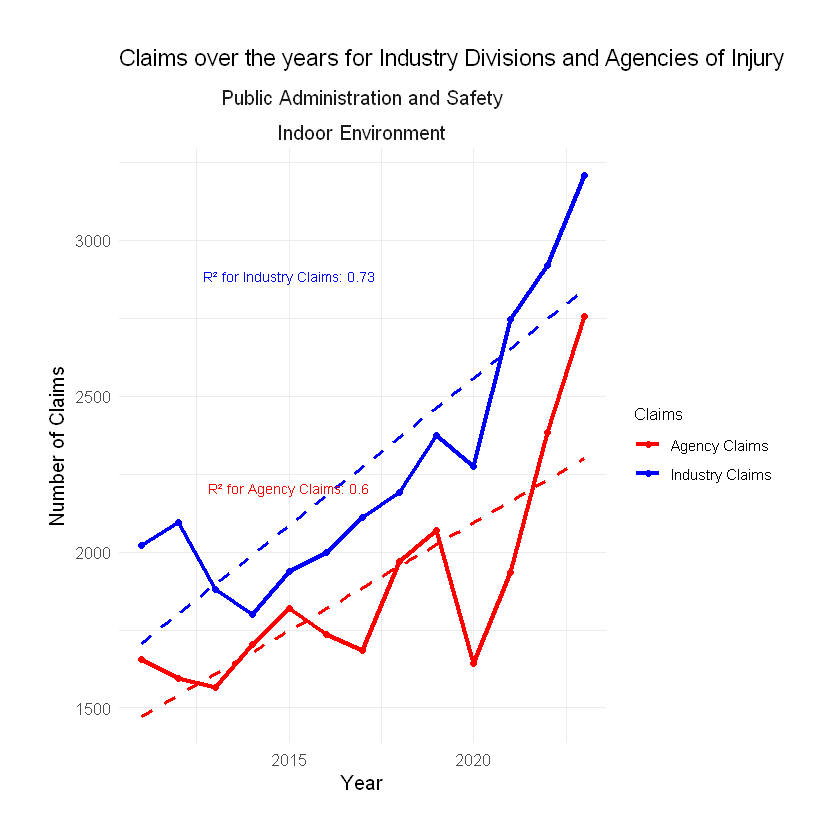

In [34]:
# Create a subset of the final plot data for the specific industry division and agency of injury
subset_plot_data <- final_plot_data %>%
    filter(Industry_Division %in% c("Public Administration and Safety", "Indoor Environment"),
           Agency_of_Injury %in% c("Public Administration and Safety", "Indoor Environment"))

# Function to calculate the R-squared value for a linear model
calculate_r_squared <- function(x, y) {
    model <- lm(y ~ x)
    summary(model)$r.squared
}

# Calculate R-squared values for Industry Claims
industry_r_squared <- calculate_r_squared(subset_plot_data$Year, subset_plot_data$Industry_Claims)

# Calculate R-squared values for Agency Claims
agency_r_squared <- calculate_r_squared(subset_plot_data$Year, subset_plot_data$Agency_Claims)

# Create the ggplot with text wrapping in facet labels and linear regression lines
ggplot(data = subset_plot_data, aes(x = Year)) +
    geom_line(aes(y = Industry_Claims, color = "Industry Claims"), size = 1.2) +
    geom_point(aes(y = Industry_Claims, color = "Industry Claims")) +
    geom_smooth(aes(y = Industry_Claims, color = "Industry Claims"), method = "lm", linetype = "dashed", se = FALSE) +  # Add linear regression line for Industry Claims
    geom_line(aes(y = Agency_Claims, color = "Agency Claims"), size = 1.2) +
    geom_point(aes(y = Agency_Claims, color = "Agency Claims")) +
    geom_smooth(aes(y = Agency_Claims, color = "Agency Claims"), method = "lm", linetype = "dashed", se = FALSE) +  # Add linear regression line for Agency Claims
    facet_wrap(~ Industry_Division + Agency_of_Injury, scales = "free_y") +  
    labs(
        title = "Claims over the years for Industry Divisions and Agencies of Injury",
        x = "Year",
        y = "Number of Claims"
    ) +
    # Annotate the R-squared values on the plot
    annotate("text", x = 2015, y = max(subset_plot_data$Industry_Claims, na.rm = TRUE) * 0.9, 
             label = paste("R² for Industry Claims:", round(industry_r_squared, 2)), color = "blue", size = 3) +
    annotate("text", x = 2015, y = max(subset_plot_data$Agency_Claims, na.rm = TRUE) * 0.8, 
             label = paste("R² for Agency Claims:", round(agency_r_squared, 2)), color = "red", size = 3) +
    scale_color_manual(name = "Claims", values = c("Industry Claims" = "blue", "Agency Claims" = "red")) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 14),      # Increase title size
        axis.title = element_text(size = 12),      # Increase axis titles
        axis.text = element_text(size = 10),       # Increase axis text
        strip.text = element_text(size = 12),      # Increase facet label size
        legend.title = element_text(size = 10),    # Increase legend title size
        legend.text = element_text(size = 9)       # Increase legend text size
    ) +
    theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))  # Add margins around the plot for better spacing


The `Public Administration and Safety` sector has an R-squared value of 0.73, while the `Indoor Environment` agency has an R-squared value of 0.6. These relatively close R-squared values suggest that both datasets have a moderately strong linear trend, although the fit for the `Public Administration and Safety` sector is slightly better.

The similar patterns observed in the plot imply that workers in the `Public Administration and Safety` industry are indeed more likely to experience injuries in the `Indoor Environment` agency compared to other environments.

### Correlation Analysis between Industry Division and Bodily Location

In [35]:
# Create an empty dataframe to store the correlation results
industry_bodily_location_correlation_df <- data.frame(bodily_location = bodily_location_df$bodily_location)

# Loop through each industry division and calculate correlations
for (i in 1:nrow(industry_division_df)) {
    # Extract industry division name and data
    industry_division <- industry_division_df$industry_division[i]
    industry_data <- industry_division_df[i, -1] # Skip the industry division name

    # Get the year columns from both datasets
    colnames_industry <- colnames(industry_data)
    colnames_bodily_location <- colnames(bodily_location_df[, -1]) # Skip the first column

    # Align the columns by matching year ranges
    common_years <- intersect(colnames_industry, colnames_bodily_location)

    # Subset both datasets to include only the common years
    industry_data_aligned <- industry_data[, common_years, drop = FALSE]
    bodily_location_data_aligned <- bodily_location_df[, c("bodily_location", common_years), drop = FALSE]

    # Transpose the industry data into a numeric vector
    industry_data_t <- as.numeric(unlist(industry_data_aligned))

    # Calculate correlations for each bodily_location
    correlations <- apply(bodily_location_data_aligned[, -1, drop = FALSE], 1, function(x) {
        cor(as.numeric(x), industry_data_t, use = "complete.obs")
    })

    # Add the correlations to the dataframe, using the industry division name as the column name
    industry_bodily_location_correlation_df[[industry_division]] <- correlations
}

# View the final correlation dataframe
head(industry_bodily_location_correlation_df)


,bodily_location,"Agriculture, Forestry and Fishing",Mining,Manufacturing,"Electricity, Gas, Water and Waste Services",Construction,Wholesale Trade,Retail Trade,Accommodation and Food Services,"Transport, Postal and Warehousing",Information Media and Telecommunications,Financial and Insurance Services,"Rental, Hiring and Real Estate Services","Professional, Scientific and Technical Services",Administrative and Support Services,Public Administration and Safety,Education and Training,Health Care and Social Assistance,Arts and Recreation Services
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cranium,0.7858473,-0.6819483,-0.4946228,0.8420731,0.76321735,-0.4610391,0.18788934,0.4851928,0.3986626,-0.58134618,0.4679981,0.40679757,0.2311707,0.7017949,0.7807645106,0.6038994,0.6972441,0.26778205
2,Eye,-0.3751577,0.6134882,0.7995119,-0.1395968,0.08818853,0.7414913,0.54753066,0.3131542,0.3804656,0.79206708,0.2005550,0.36627321,0.6010775,0.3595352,-0.0005597337,0.3927509,-0.1725192,0.43222173
3,Ear,0.5984191,0.1139129,0.3223719,0.6788284,0.81498164,0.3332656,0.72206854,0.5909826,0.8990135,0.02022819,0.6815745,0.26820344,0.8208002,0.7100763,0.8609189997,0.8113868,0.8261767,0.40458902
4,Mouth,-0.8199510,0.3512100,0.3746806,-0.7433086,-0.72072329,0.4778585,-0.06020086,-0.3203535,-0.3974489,0.61474016,-0.5751996,-0.07262296,-0.1787752,-0.5444190,-0.8168917609,-0.3768582,-0.7802883,0.03406336
5,Nose,0.4721223,-0.1378117,-0.1416317,0.5879657,0.39819334,-0.2058750,0.12927501,0.2340392,0.3123235,-0.32631850,0.4646995,0.12961706,0.2604348,0.3335923,0.4188379933,0.1528666,0.3774725,-0.05638855
6,"Face, Not Elsewhere Classified",0.2450118,0.0182685,0.2565452,0.3647168,0.62072143,0.2879565,0.54410702,0.7719830,0.6460861,0.36997281,0.2868492,0.61858009,0.6090801,0.7734668,0.5896739849,0.7938397,0.3657459,0.73531838


In [36]:
# Filter out top 10 data with largest correlation score
top_10_industry_bodily_correlation = industry_bodily_location_correlation_df %>%
    gather(key = "industry_division", value = "correlation", -bodily_location) %>%
    group_by(bodily_location) %>%
    top_n(10, correlation) %>%
    arrange(desc(correlation))

head(top_10_industry_bodily_correlation)

bodily_location,industry_division,correlation
<chr>,<chr>,<dbl>
Back - Upper Or Lower,Wholesale Trade,0.9863762
Psychological System,Public Administration and Safety,0.9633264
Ankle,Public Administration and Safety,0.9611337
Psychological System,Construction,0.9521639
"Hand, Fingers And Thumb",Construction,0.9445907
Back - Upper Or Lower,Manufacturing,0.9343282


In [37]:
# Initialize an empty list to store the plot data for each iteration
plot_data_list <- list()

# Loop through top 12 correlations and collect data
for (i in 1:12) {
    bodily_location <- top_10_industry_bodily_correlation$bodily_location[i]
    industry_division <- top_10_industry_bodily_correlation$industry_division[i]
    correlation <- top_10_industry_bodily_correlation$correlation[i]

    # Extract the industry data for the specific industry division
    industry_data <- industry_division_df[industry_division_df$industry_division == industry_division, -1]

    # Extract the bodily location data for the specific bodily location, removing the first two columns
    bodily_location_data <- bodily_location_df[bodily_location_df$bodily_location == bodily_location, -1]

    # Create a data frame for each combination
    years <- 2011:2023
    plot_data <- data.frame(
        Year = years,
        Industry_Claims = as.numeric(unlist(industry_data)),
        Bodily_Location_Claims = as.numeric(unlist(bodily_location_data)),
        Industry_Division = industry_division,
        Bodily_Location = bodily_location
    )

    # Store the plot data for this iteration in the list
    plot_data_list[[i]] <- plot_data
}

# Combine all the collected plot data into a single dataframe
final_plot_data <- do.call(rbind, plot_data_list)

print(final_plot_data)

    Year Industry_Claims Bodily_Location_Claims
1   2011            1984                   5609
2   2012            1945                   5469
3   2013            1883                   5221
4   2014            1792                   4894
5   2015            1799                   4929
6   2016            1683                   4528
7   2017            1607                   4253
8   2018            1677                   4501
9   2019            1699                   4475
10  2020            1583                   4231
11  2021            1698                   4587
12  2022            1702                   4490
13  2023            1885                   5016
14  2011            2020                   3059
15  2012            2096                   3057
16  2013            1879                   3001
17  2014            1800                   2983
18  2015            1939                   3073
19  2016            1998                   3118
20  2017            2112                

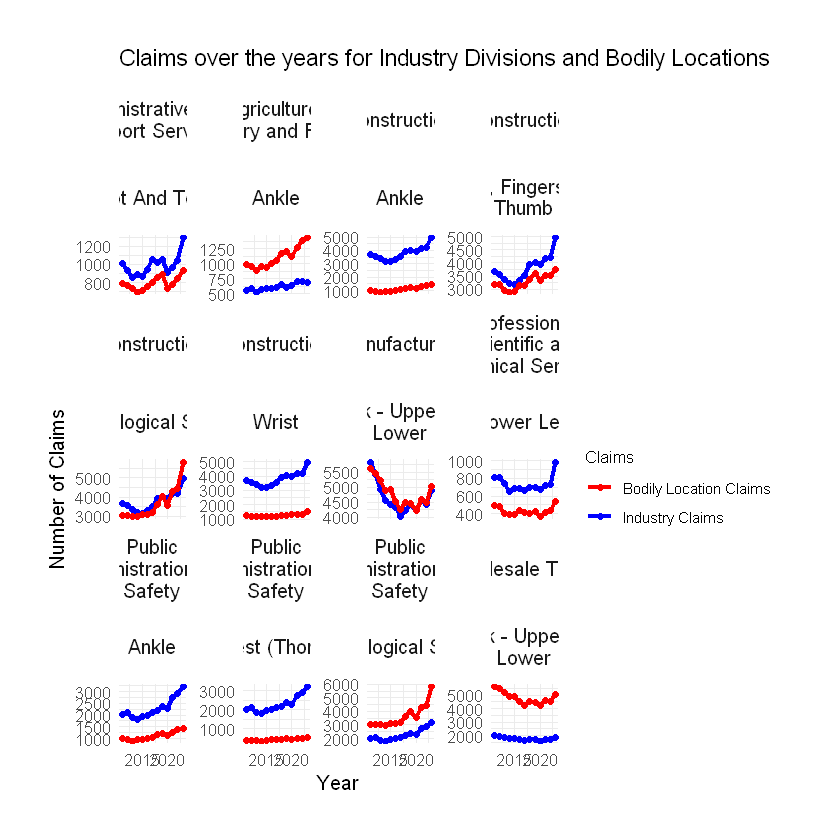

In [38]:
# {r, fig.width=12, fig.height=12}
custom_labeller <- labeller(
    Industry_Division = function(x) str_wrap(x, width = 20), 
    Bodily_Location = function(x) str_wrap(x, width = 20) 
)


# Plot the data
ggplot(data = final_plot_data, aes(x = Year)) +
    geom_line(aes(y = Industry_Claims, color = "Industry Claims"), size = 1.2) +
    geom_point(aes(y = Industry_Claims, color = "Industry Claims")) +
    geom_line(aes(y = Bodily_Location_Claims, color = "Bodily Location Claims"), size = 1.2) +
    geom_point(aes(y = Bodily_Location_Claims, color = "Bodily Location Claims")) +
    facet_wrap(~ Industry_Division + Bodily_Location, scales = "free_y", labeller = custom_labeller) +  # Apply custom labeller
    labs(
        title = "Claims over the years for Industry Divisions and Bodily Locations",
        x = "Year",
        y = "Number of Claims"
    ) +
    scale_color_manual(name = "Claims", values = c("Industry Claims" = "blue", "Bodily Location Claims" = "red")) +
    theme_minimal() +
    theme(
        plot.title = element_text(size = 14),      # Increase title size
        axis.title = element_text(size = 12),      # Increase axis titles
        axis.text = element_text(size = 10),       # Increase axis text
        strip.text = element_text(size = 12),      # Increase facet label size
        legend.title = element_text(size = 10),    # Increase legend title size
        legend.text = element_text(size = 9)       # Increase legend text size
    ) +
    theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))  # Add margins around the plot for better spacing